In [2]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [3]:
import matplotlib as mpl

In [15]:
# polygon_w - Seasonal Cycle
seasonyeardepth_len_w = [300, 681, 397, 1406, 1387, 775, 282, 901, 351, 1152, 610, 102]
countwithinpolygon_list_w = [468, 975, 617, 1924, 2007, 1293, 595, 1773, 445, 1420, 728, 118]
diff_w = [168, 294, 220, 518, 620, 518, 313, 872, 94, 268, 118, 16]
mld_mean_w = [41.632999999999996, 40.09985315712188, 40.76498740554156, 31.832432432432434, 22.61211247296323, 21.215870967741935, 14.159574468085106, 16.49056603773585, 17.313390313390315, 24.18402777777778, 30.114754098360656, 35.38235294117647]
mld_std_w = [20.346415187939126, 23.211526517394706, 23.00929192027398, 20.47886432705551, 18.475017456412516, 17.688282791508705, 13.15453959193024, 14.27458526452779, 13.369771477496387, 14.89526473597512, 17.6049530666945, 17.993486903161823]
mld_max_w = [111.0, 175.0, 179.0, 104.0, 88.0, 82.0, 68.0, 71.0, 70.0, 76.0, 89.0, 83.0]
mld_min_w = [6.0, 6.0, 6.0, 5.4, 5.1, 5.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
mld_q25_w = [28.75, 20.0, 23.0, 13.0, 8.0, 8.0, 7.0, 7.0, 8.0, 12.0, 15.0, 21.25]
mld_q75_w = [54.0, 56.0, 55.0, 49.0, 35.0, 34.5, 13.0, 19.0, 21.0, 34.0, 42.0, 46.75]

ratio_mean_w = [0.6317262798772597, 0.537678882135824, 0.5698898447975494, 0.46842736714814415, 0.3588157262947534, 0.37095158711572573, 0.23895874669483722, 0.2929549411137725, 0.29836217372885715, 0.37288246197054176, 0.46376104311845, 0.5880076416798478]
ratio_std_w = [0.32815674027055153, 0.34935682773740806, 0.34664025063187265, 0.3543103007670909, 0.3319852467452263, 0.3569009312959162, 0.27010697178634796, 0.31099452854005544, 0.28425989721454964, 0.30644275224894024, 0.31967021635468107, 0.3342639706817377]
ratio_max_w = [0.9942307692307693, 1.0, 1.0, 1.0, 0.9866666666666667, 1.0, 0.9811320754716981, 1.0, 0.9803921568627451, 1.0, 0.9864864864864865, 0.9696969696969697]
ratio_min_w = [0.02023809523809524, 0.008888888888888889, 0.00975, 0.007619047619047619, 0.0073750000000000005, 0.005454545454545455, 0.00818452380952381, 0.01405152224824356, 0.012779552715654952, 0.017543859649122806, 0.027848101265822784, 0.0594059405940594]
ratio_q25_w = [0.30474806201550386, 0.1897810218978102, 0.24545454545454545, 0.14130434782608695, 0.10827092152393358, 0.0967741935483871, 0.08706205149852259, 0.0975609756097561, 0.11267605633802817, 0.13481153876802932, 0.1825560316413975, 0.25577507598784194]
ratio_q75_w = [0.92, 0.9259259259259259, 0.9288888888888889, 0.9137931034482759, 0.569047619047619, 0.875, 0.2256048387096774, 0.3170731707317073, 0.3532828282828283, 0.5256944444444445, 0.8708183990442054, 0.9210526315789473]

In [186]:
# polygon_t - Seasonal Cycle
seasonyeardepth_len_t = [162, 250, 174, 897, 684, 375, 58, 282, 484, 1202, 827, 62]
countwithinpolygon_list_t = [207, 302, 200, 1048, 912, 598, 148, 610, 583, 1282, 881, 67]
diff_t = [45, 52, 26, 151, 228, 223, 90, 328, 99, 80, 54, 5]
mld_mean_t = [66.70987654320987, 68.69839999999999, 44.233333333333334, 22.47123745819398, 13.233479532163743, 10.674666666666667, 8.172413793103448, 8.868794326241135, 12.632231404958677, 20.991680532445923, 30.308343409915356, 36.33870967741935]
mld_std_t = [35.78013831045965, 42.29872051776507, 40.16136894523835, 18.719474532830993, 8.204406471748865, 4.992209753428058, 2.34989310860701, 2.991800490934591, 6.424793335275244, 10.723258997706056, 17.787281722872695, 19.461246477656562]
mld_max_t = [166.0, 187.0, 220.0, 168.0, 73.0, 48.0, 17.0, 26.0, 49.0, 61.0, 121.0, 80.0]
mld_min_t = [6.0, 6.0, 6.0, 6.0, 5.1, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0]
mld_q25_t = [35.0, 33.0, 12.0, 10.0, 8.0, 7.0, 6.0, 7.0, 8.0, 13.0, 16.0, 21.25]
mld_q75_t = [95.0, 98.0, 72.75, 29.0, 16.0, 13.0, 9.0, 10.75, 15.0, 28.0, 42.0, 49.5]

ratio_mean_t = [0.43788707455941084, 0.4744441144762219, 0.3090466223166699,0.17937955435665573, 0.10615252961433429, 0.0892623998428511, 0.06916060818480871, 0.07796180339101172, 0.08809360388418862, 0.16033749614061393, 0.23501430543720112, 0.36501816196794595]
ratio_std_t = [0.238503897408544, 0.28194992458791873, 0.2613041492944159, 0.1770971487012228, 0.10816542706633142, 0.08701669946797698, 0.04177440229504964, 0.05008009703241262, 0.07707540481009557, 0.12847278542881743, 0.16243448792541879, 0.21818299669545385]
ratio_max_t = [0.9708029197080292, 0.98989898989899, 0.9632352941176471, 0.9896907216494846, 1.0, 0.9019607843137255, 0.26153846153846155, 0.3, 0.7368421052631579, 0.9791666666666666, 0.9456521739130435, 0.8]
ratio_min_t = [0.04819277108433735, 0.03773584905660377, 0.03153153153153153, 0.021505376344086023, 0.026200873362445413, 0.024, 0.023809523809523808, 0.022222222222222223, 0.023622047244094488, 0.021739130434782608, 0.022641509433962263, 0.051094890510948905]
ratio_q25_t = [0.23574679681128155, 0.2323785594639866, 0.0945147903809321, 0.07281553398058252, 0.05794107078692059, 0.04896632566069906, 0.041710251046025104, 0.042682926829268296, 0.05072638693820225, 0.08, 0.11685516668150919, 0.1758893280632411]
ratio_q75_t = [0.6126373626373627, 0.6704347826086957, 0.4758928571428571, 0.21505376344086022, 0.11633551591781441, 0.09338662790697674, 0.07973684210526316, 0.0935083762886598, 0.09265873015873016, 0.19349462365591397, 0.29857117181883536, 0.5263594164456233]

In [187]:
# polygon_y - Seasonal Cycle
seasonyeardepth_len_y = [96, 148, 63, 670, 217, 273, 39, 238, 249, 699, 441, 5]
countwithinpolygon_list_y = [122, 160, 78, 740, 257, 408, 73, 518, 292, 758, 463, 5]
diff_y = [26, 12, 15, 70, 40, 135, 34, 280, 43, 59, 22, 0]
mld_mean_y = [38.206250000000004, 46.027702702702705, 35.41111111111111,22.386865671641793, 14.194009216589862, 11.353479853479854, 9.051282051282051, 9.483193277310924, 13.032128514056225, 22.891273247496425, 29.233560090702948, 30.0]
mld_std_y = [23.624725803082526, 32.58158537476708, 23.923377098171258, 15.788279443559581, 7.133946307406983, 7.015064688173905, 3.186097347078783, 3.9563972094078554, 13.22370740897206, 12.582985581044548, 15.69673936060541, 5.138093031466052]
mld_max_y = [114.0, 140.0, 112.0, 107.0, 43.0, 75.0, 20.0, 30.0, 196.0, 80.0, 76.0, 37.0]
mld_min_y = [8.0, 6.0, 6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0]
mld_q25_y = [19.75, 21.75, 16.5, 11.0, 9.0, 7.0, 7.0, 7.0, 8.0, 13.0, 17.0, 30.0]
mld_q75_y = [53.0, 64.3, 51.5, 30.0, 17.0, 13.0, 10.0, 11.0, 15.0, 31.0, 38.0, 31.0]

ratio_mean_y = [0.2294428773295898, 0.259523652916764, 0.2280188466216288, 0.14315854976364634, 0.09000473981109815, 0.07537288315747524, 0.09927230069644673, 0.0746975188842602, 0.07022142440919318, 0.14499919873795383, 0.16502568078655624, 0.3358017153295403]
ratio_std_y = [0.1845204507941943, 0.23188247836107279, 0.22006630372384067, 0.1531801448630057, 0.063034849777392, 0.09107430268599895, 0.06792505008875445, 0.05215941633179663, 0.07788818576025777, 0.11210255078508284, 0.12661789839013107, 0.14099126271288828]
ratio_max_y = [0.9285714285714286, 0.9833333333333333, 0.9491525423728814, 0.9836065573770492, 0.3968253968253968, 0.9375, 0.32786885245901637, 0.3717948717948718, 0.7358490566037735, 0.9315068493150684, 0.9846153846153847, 0.578125]
ratio_min_y = [0.0375, 0.01639344262295082, 0.027586206896551724, 0.017094017094017096, 0.01744186046511628, 0.016574585635359115, 0.0182370820668693, 0.01643835616438356, 0.02, 0.0196078431372549, 0.01634877384196185, 0.16666666666666666]
ratio_q25_y = [0.08977480882737766, 0.08992094861660078, 0.08877551020408164, 0.05302413588259884, 0.049019607843137254, 0.036585365853658534, 0.04546057167099751, 0.03719806763285024, 0.03684210526315789, 0.07396011396011395, 0.08536585365853659, 0.25609756097560976]
ratio_q75_y = [0.2816520467836257, 0.3501552795031056, 0.2446311858076564, 0.17710331159698248, 0.10714285714285714, 0.08333333333333333, 0.12587019986525938, 0.09836065573770492, 0.07296137339055794, 0.17817460317460318, 0.208955223880597, 0.3924050632911392]

In [188]:
# polygon_x - NMAB - Seasonal Cycle
seasonyeardepth_len_x = [134, 545, 781, 289, 225, 190, 88, 228, 759, 387, 348, 57]
countwithinpolygon_list_x = [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
diff_x = [13, 118, 219, 52, 138, 199, 211, 221, 179, 73, 57, 11]
mld_mean_x = [40.32089552238806, 34.36330275229358, 22.357234314980793, 24.269896193771626, 11.053333333333333, 10.321052631578947, 7.8977272727272725, 9.333333333333334, 14.02635046113307, 21.478036175710596, 28.724137931034484, 34.29824561403509]
mld_std_x = [17.454247546284968, 18.55604286227282, 16.362543169798172, 13.987011782548166, 6.477777396607574, 5.52954542220039, 3.2440146729549646, 4.668232819902913, 7.025220235368986, 11.472533575211287, 14.34464107968941, 15.71005367259495]
mld_max_x = [89.0, 102.0, 96.0, 80.0, 46.0, 39.0, 33.0, 41.0, 57.0, 58.0, 77.0, 66.0]
mld_min_x = [7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0]
mld_q25_x = [26.0, 19.0, 10.0, 12.0, 7.0, 7.0, 6.0, 7.0, 9.0, 12.0, 18.0, 20.0]
mld_q75_x = [54.0, 49.0, 30.0, 33.0, 13.0, 11.0, 8.25, 10.0, 17.0, 29.0, 38.0, 45.0]

ratio_mean_x = [0.6543715624446604, 0.5164459841645641, 0.44809238631449616, 0.3983684263111593, 0.20603434241613502, 0.22137029144563197, 0.1412680864486041, 0.16724929579073888, 0.3541356618178475, 0.3735691217341851, 0.496239704407161, 0.6454451089659192]
ratio_std_x = [0.27520427458669716, 0.2878281692268379, 0.2528669616792186, 0.24995452577992494, 0.16663669383501506, 0.17458058175855273, 0.07079583822661088, 0.12189865301964828, 0.22335141654611135, 0.24092114673148135, 0.2636091483214908, 0.27514577901318255]
ratio_max_x = [0.9661016949152542, 0.9827586206896551, 0.9846153846153847, 0.972972972972973, 0.9387755102040817, 0.9285714285714286, 0.6470588235294118, 0.9111111111111111, 0.9615384615384616, 1.0, 0.9836065573770492, 0.9622641509433962]
ratio_min_x = [0.08227848101265822, 0.03571428571428571, 0.03896103896103896, 0.04519774011299435, 0.033707865168539325, 0.044585987261146494, 0.04838709677419355, 0.03896103896103896, 0.04, 0.045112781954887216, 0.034482758620689655, 0.1]
ratio_q25_x = [0.45513322884012536, 0.25675675675675674, 0.23076923076923078, 0.2, 0.10526315789473684, 0.11336094493020403, 0.10667293233082706, 0.10344827586206896, 0.17142857142857143, 0.18604651162790697, 0.27234206471494604, 0.3493150684931507]
ratio_q75_x = [0.911634460547504, 0.8, 0.65, 0.5555555555555556, 0.22950819672131148, 0.2633442265795207, 0.1548582995951417, 0.19047619047619047, 0.5, 0.5357142857142857, 0.7122252747252747, 0.9]


In [10]:
# polygon_v - SMAB - Seasonal Cycle
seasonyeardepth_len_v = [140, 909, 1563, 145, 309, 242, 310, 419, 1340, 132, 491]
countwithinpolygon_list_v = [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572 ]
diff_v = [29, 269, 472, 29, 340, 266, 508, 309, 642, 42, 81 ]
mld_mean_v = [39.47142857142857, 31.386138613861387, 22.213051823416507, 23.4, 10.472491909385113, 8.690082644628099, 8.77741935483871, 8.77565632458234, 11.876119402985074, 21.689393939393938, 21.09775967413442]
mld_std_v = [24.69483545114613, 23.757888281721268, 18.231925444167025, 15.796725981168944, 5.972162006602472, 2.7632148290563605, 2.5334166242218146, 2.678880405236976, 5.26785774670067, 12.84413117705112, 12.014019944437381 ]
mld_max_v = [128.0, 179.0, 177.0, 114.0, 49.0, 21.0, 30.0, 20.0, 48.0, 59.0, 81.0 ]
mld_min_v = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0 ]
mld_q25_v = [19.0, 14.0, 10.0, 13.0, 7.0, 7.0, 7.0, 7.0, 8.0, 12.0, 11.0 ]
mld_q75_v = [53.25, 41.0, 29.0, 28.0, 12.0, 10.0, 10.0, 10.0, 14.0, 30.0, 27.0 ]

ratio_mean_v = [0.5584531693862638, 0.5340014537939606, 0.4685282058103854, 0.4373037791954001, 0.2297858080020769, 0.20403076921798838, 0.16537040050591867, 0.19161627196428183, 0.32627352623656497, 0.40694321377622217, 0.5216711825562155 ]
ratio_std_v = [0.268180723301162, 0.2831891914902862, 0.26373781203483776, 0.2658791470306868, 0.16075894858597298, 0.11404796223662514, 0.06881515641417804, 0.11660904568011292, 0.21369030588375137, 0.2268435094441364, 0.2767786590385974 ]
ratio_max_v = [0.9666666666666667, 1.0, 0.9836065573770492, 0.96, 0.9245283018867925, 0.8076923076923077, 0.5084745762711864, 0.6818181818181818, 1.0, 0.975, 0.9795918367346939 ]
ratio_min_v = [0.06976744186046512, 0.03428571428571429, 0.0379746835443038, 0.04316546762589928, 0.04794520547945205, 0.05714285714285714, 0.03684210526315789, 0.03278688524590164, 0.03, 0.0546875, 0.04081632653061224 ]
ratio_q25_v = [0.33394736842105266, 0.27835051546391754, 0.2457578372159908, 0.18487394957983194, 0.12280701754385964, 0.12121899576527526, 0.11955223880597014, 0.10741758241758242, 0.14938239835306227, 0.23036858974358973, 0.26572528883183566 ]
ratio_q75_v = [0.8337378640776699, 0.8125, 0.6900656814449918, 0.6206896551724138, 0.2826086956521739, 0.24861111111111112, 0.20234375, 0.24, 0.46222527472527475, 0.5699404761904762, 0.7916666666666666 ]


In [11]:
month = [1,2,3,4,5,6,7,8,9,10,11]

In [13]:
print(np.max(mld_mean_v))
print(np.min(mld_mean_v))

39.47142857142857
8.690082644628099


In [14]:
print(np.max(ratio_mean_v))
print(np.min(ratio_mean_v))

0.5584531693862638
0.16537040050591867


In [148]:
ratio_mean100 = [i * 100 for i in ratio_mean_v]
ratio_std100 = [i * 100 for i in ratio_std_v]
ratio_max100 = [i * 100 for i in ratio_max_v]
ratio_min100 = [i * 100 for i in ratio_min_v]
ratio_q25100 = [i * 100 for i in ratio_q25_v]
ratio_q75100 = [i * 100 for i in ratio_q75_v]

In [149]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

In [151]:
mean_ratio_asarray = np.asarray(ratio_mean100)
std_ratio_asarray = np.asarray(ratio_std100)

In [190]:
mean_asarray_x = np.asarray(mld_mean_x)
std_asarray_x = np.asarray(mld_std_x)

In [191]:
mean_asarray_y = np.asarray(mld_mean_y)
std_asarray_y = np.asarray(mld_std_y)

In [192]:
mean_asarray_w = np.asarray(mld_mean_w)
std_asarray_w = np.asarray(mld_std_w)

In [193]:
mean_asarray_t = np.asarray(mld_mean_t)
std_asarray_t = np.asarray(mld_std_t)

In [194]:
mean_asarray_v = np.asarray(mld_mean_v)
std_asarray_v = np.asarray(mld_std_v)

NameError: name 'mld_mean' is not defined

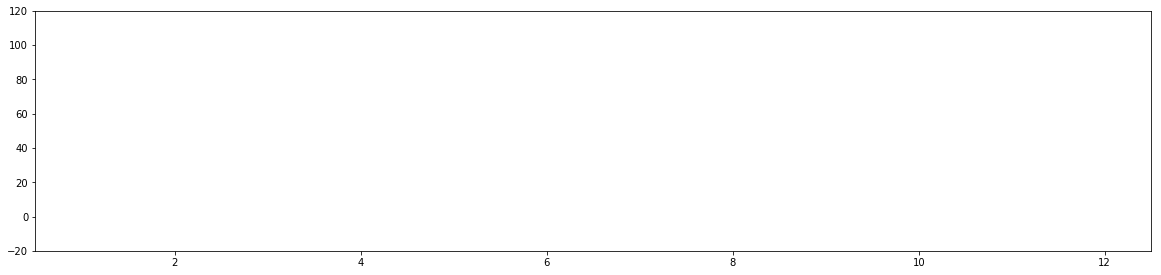

In [7]:
plt.figure(figsize=(20,15))
plt.figure(1)

plt.subplot(311)
plt.ylim(-20,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, mld_q25, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, mld_q75, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)

plt.errorbar(month,mld_mean, mld_std,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray - std_asarray, mean_asarray + std_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(10.25, 95, 'SMAB', dict(size=30))

plt.subplot(312)
plt.xlim(0.5,12.5)
plt.ylim(0,2100)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([0,300,600,900,1200,1500,1800,2100], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Data availability', fontsize = 15)
plt.bar(month, seasonyeardepth_len, color='darkblue', edgecolor='black', width = 0.6)
plt.bar(month, diff, bottom=seasonyeardepth_len, color='aliceblue', edgecolor='black', width=0.6)

plt.subplot(313)
plt.ylim(-0.2,1.2)
plt.xlim(0.5,12.5)
plt.plot(month, ratio_mean100, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.scatter(month, ratio_q25100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.scatter(month, ratio_q75100, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)

plt.errorbar(month,ratio_mean100, ratio_std100,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_ratio_asarray - std_ratio_asarray, mean_ratio_asarray + std_ratio_asarray,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD / water column depth (%)', fontsize = 15)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-20,0,20,40,60,80,100,120], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
# plt.text(10.25, 95, 'GB', dict(size=30))

plt.savefig('seasonal_EGoM')
plt.show()

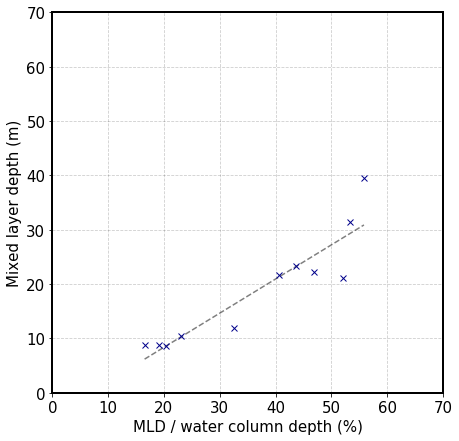

In [154]:
plt.figure(figsize=(7,7))
plt.ylim(0,70)

plt.scatter(ratio_mean100, mld_mean, marker = 'x', color='darkblue', linewidth=1,alpha = 1, zorder= 60)
plt.xlabel('MLD / water column depth (%)', fontsize = 15)
plt.ylabel('Mixed layer depth (m)', fontsize = 15)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.plot(np.unique(ratio_mean100), np.poly1d(np.polyfit(ratio_mean100, mld_mean, 1))(np.unique(ratio_mean100)),alpha = 0.5, color = 'black', linestyle = '--')
plt.xticks([0,10,20, 30,40,50,60,70], fontsize = 15) 
plt.yticks([0,10,20, 30,40,50,60,70], fontsize = 15) 
plt.savefig('NMAB_scatter')
plt.show()

In [138]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

In [139]:
a, b = best_fit(ratio_mean100, mld_mean)

best fit line:
y = -2.06 + 0.61x


In [204]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
month_new = [1,2,3,4,5,6,7,8,9,10,11]

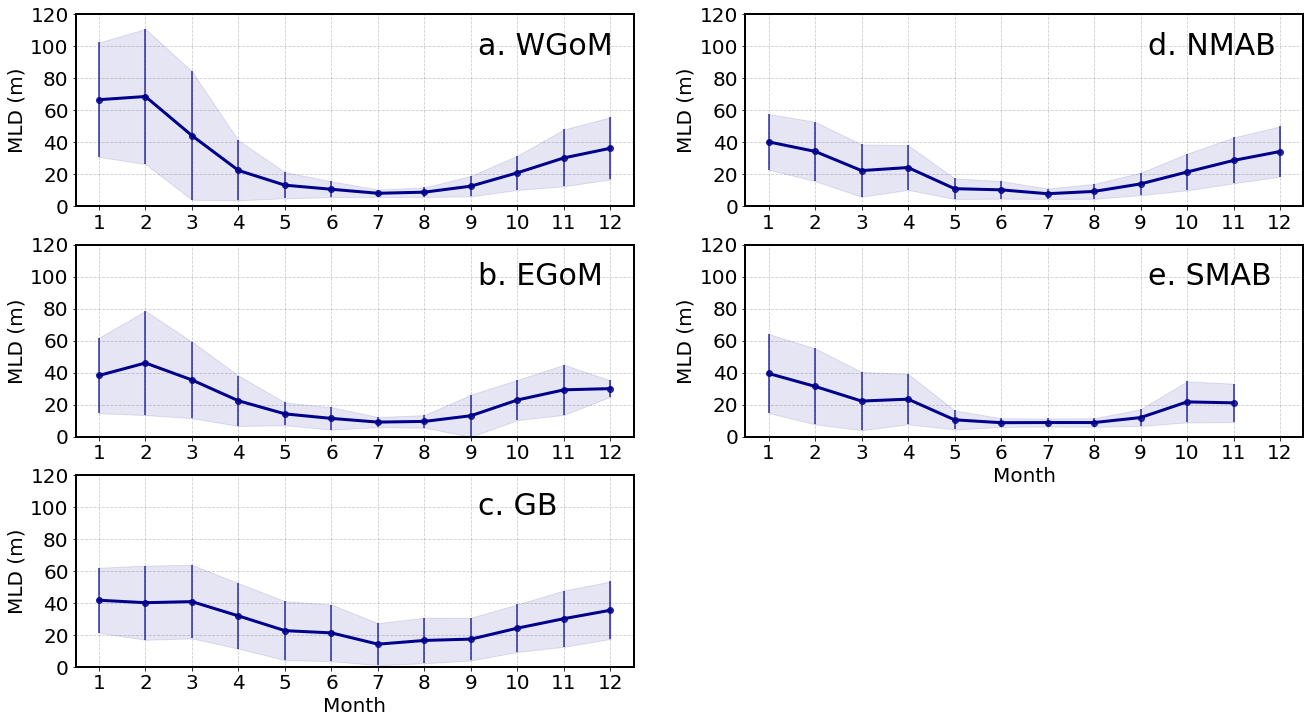

In [224]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plt.figure(1)

plt.subplot(321) # Western Gulf of Maine
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean_t, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, mld_q25_t, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, mld_q75_t, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean_t, mld_std_t,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray_t - std_asarray_t, mean_asarray_t + std_asarray_t,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'a. WGoM', dict(size=30))

plt.subplot(322) # Northern MAB
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean_x, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, mld_q25_x, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, mld_q75_x, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean_x, mld_std_x,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray_x - std_asarray_x, mean_asarray_x + std_asarray_x,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'd. NMAB', dict(size=30))

# verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323) # Eastern Gulf of Maine
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean_y, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, mld_q25_y, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, mld_q75_y, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean_y, mld_std_y,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray_y - std_asarray_y, mean_asarray_y + std_asarray_y,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'b. EGoM', dict(size=30))

plt.subplot(324) # Southern MAB
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.plot(month_new, mld_mean_v, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month_new, mld_q25_v, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month_new, mld_q75_v, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month_new,mld_mean_v, mld_std_v,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month_new, mean_asarray_v - std_asarray_v, mean_asarray_v + std_asarray_v,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'e. SMAB', dict(size=30))
plt.xlabel('Month', fontsize = 20)

plt.subplot(325) # Georges Bank
plt.ylim(0,120)
plt.xlim(0.5,12.5)
plt.plot(month, mld_mean_w, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.scatter(month, mld_q25_w, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
# plt.scatter(month, mld_q75_w, marker = 'x', color='black', linewidth=1,alpha = 1, zorder= 60)
plt.errorbar(month,mld_mean_w, mld_std_w,linestyle='None', marker='o',color='darkblue',alpha= 0.8, markersize=6, zorder = 30)
plt.fill_between(month, mean_asarray_w - std_asarray_w, mean_asarray_w + std_asarray_w,color = 'darkblue', alpha = 0.1,zorder = 30)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'c. GB', dict(size=30))
plt.xlabel('Month', fontsize = 20)

# plt.subplot(326)
# plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
plt.savefig('clim_seasonalcycle')

plt.show()
